<a href="https://colab.research.google.com/github/LorenzoPunzi/Esercizio_KerasSimple2020/blob/main/Copy_of_Esercizio_KerasSimple2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Create a **classifier** using either a shallow Neural Network (such as MLP with a single hidden layer) or a Deep Network.
The classifier can take as input some user generated data, e.g. a partition of the [0,1]x[0,1] square (x1 > x2^2).

Complete the code below where indicated

Use Keras docs as needed https://keras.io/api/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from keras.layers import  Input, Dense #<- which layers are needed as a bare minimum to build a MLP or a feed fwd deep net?
from keras.models import Model



Generate some data

In [ ]:
from math import *
# Fixing random state for reproducibility
np.random.seed(123)

#try changing this
theFunction = lambda x1,x2 : np.sin(x1*20) > x2*x2 - x1  #This way a BOOLEAN function is created. Try using a different function, keep in mind x1 and x2 are numpy arrays!

N=3000
x1 = 1.0 * np.random.rand(N)
x2 = 1.0 * np.random.rand(N)
y=theFunction(x1,x2) #its vectorized since it is calculated with numpy.sin of a vector


print(x1[:10])
print(x2[:10])
X= np.stack((x1,x2), axis = 1) #check out the numpy cheatsheet, create a matrix with two columns one with data from x1, the other from x2

# print the first 10 entries of X and y and X shape
print(X[:10,:])
print(X.shape)
print(y[:10])

[0.69646919 0.28613933 0.22685145 0.55131477 0.71946897 0.42310646
 0.9807642  0.68482974 0.4809319  0.39211752]
[0.96942611 0.72178369 0.18189166 0.88202837 0.47702151 0.84685675
 0.83090753 0.01735057 0.23366189 0.91109161]
[[0.69646919 0.96942611]
 [0.28613933 0.72178369]
 [0.22685145 0.18189166]
 [0.55131477 0.88202837]
 [0.71946897 0.47702151]
 [0.42310646 0.84685675]
 [0.9807642  0.83090753]
 [0.68482974 0.01735057]
 [0.4809319  0.23366189]
 [0.39211752 0.91109161]]
(3000, 2)
[ True False False False  True  True  True  True  True  True]


Now let's look  at the data we generated, does it look like you expect?


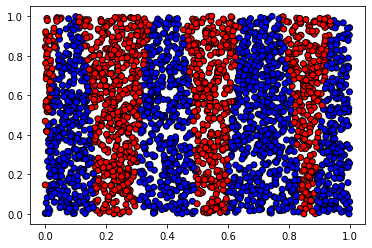

In [ ]:
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, edgecolors='k')
        

Let's compare with a colormap made using directly the generating function (remember, in real case world we will not know such function). It is the function we want to build with the NN

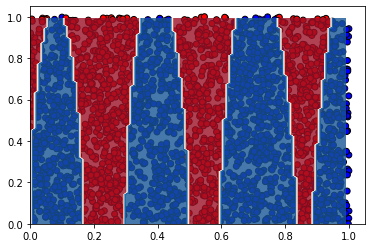

In [ ]:
xx1, xx2 = np.meshgrid(np.arange(0, 1, 0.01),np.arange(0, 1, 0.01))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, edgecolors='k')
plt.contourf(xx1, xx2, (theFunction(xx1,xx2)).reshape(xx1.shape), cmap=plt.cm.RdBu, alpha=.8)

In [ ]:

inputs=Input(shape=(2)) #FILL THE DOTS# what is the shape that our input data has?
hidden=Dense(500,activation="relu")(inputs) #create a new Dense layer with 500 nodes taking "inputs" as input , what is the most appropriate activation? ReLu is best these days
outputs = Dense(1, activation='sigmoid')(hidden) # what is the most appropriate activation for the final node of a classifier? Sigmoid is best
model = Model(inputs=inputs, outputs=outputs)
model.compile(loss='binary_crossentropy', optimizer='adam')

model.summary() #this prints this output on the shell. 500->1500 because each dense neuron is connected to the 2 inputs + 1 bias node

# print the model structure, it should look like
#Layer (type)                 Output Shape              Param #   
#=================================================================
#input_1 (InputLayer)         [(None, 2)]               0         
#_________________________________________________________________
#dense (Dense)                (None, 500)               1500      
#_________________________________________________________________
#dense_1 (Dense)              (None, 1)                 501       
#=================================================================

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense (Dense)               (None, 500)               1500      
                                                                 
 dense_1 (Dense)             (None, 1)                 501       
                                                                 
Total params: 2,001
Trainable params: 2,001
Non-trainable params: 0
_________________________________________________________________


Split the dataset in training+validation and test, then fit




In [ ]:
history=model.fit(X,y,validation_split=0.5,epochs=2500,verbose=1) #FILL THE DOTS# What is the name of the keras function to train a model




Streaming output truncated to the last 5000 lines.
47/47 [==============================] - 0s 4ms/step - loss: 0.5939 - val_loss: 0.5970
Epoch 2/2500
47/47 [==============================] - 0s 6ms/step - loss: 0.5926 - val_loss: 0.5963
Epoch 3/2500
47/47 [==============================] - 0s 4ms/step - loss: 0.5935 - val_loss: 0.5976
Epoch 4/2500
47/47 [==============================] - 0s 4ms/step - loss: 0.5921 - val_loss: 0.5956
Epoch 5/2500
47/47 [==============================] - 0s 4ms/step - loss: 0.5907 - val_loss: 0.5961
Epoch 6/2500
47/47 [==============================] - 0s 6ms/step - loss: 0.5904 - val_loss: 0.5948
Epoch 7/2500
47/47 [==============================] - 0s 4ms/step - loss: 0.5886 - val_loss: 0.5949
Epoch 8/2500
47/47 [==============================] - 0s 6ms/step - loss: 0.5882 - val_loss: 0.5936
Epoch 9/2500
47/47 [==============================] - 0s 6ms/step - loss: 0.5868 - val_loss: 0.5935
Epoch 10/2500
47/47 [==============================] - 0s 6ms/

In the history object a history.history dictionary contains the validation and training loss vs epoch, let's try to plot them and compare to evaluate the training

dict_keys(['loss', 'val_loss'])
[0.5939379930496216, 0.5925946235656738, 0.5934544801712036, 0.592083215713501, 0.5906620025634766, 0.590395450592041, 0.588586151599884, 0.588176429271698, 0.5867636799812317, 0.5866454839706421, 0.5856627821922302, 0.5869858264923096, 0.5856338143348694, 0.5843660831451416, 0.5835905075073242, 0.5817422866821289, 0.5805621147155762, 0.5834628343582153, 0.5807231664657593, 0.5811768174171448, 0.5791426301002502, 0.5776180624961853, 0.5786850452423096, 0.57724928855896, 0.5772121548652649, 0.5773477554321289, 0.5759271383285522, 0.5744762420654297, 0.5762550234794617, 0.5739423632621765, 0.5731952786445618, 0.5716907382011414, 0.571550726890564, 0.5699734091758728, 0.5692549347877502, 0.5699344277381897, 0.5675308108329773, 0.5676886439323425, 0.5667884349822998, 0.565959095954895, 0.5656723976135254, 0.5635948777198792, 0.5622581243515015, 0.5625666975975037, 0.5608059167861938, 0.5598227381706238, 0.5609882473945618, 0.5592879056930542, 0.5580776929855

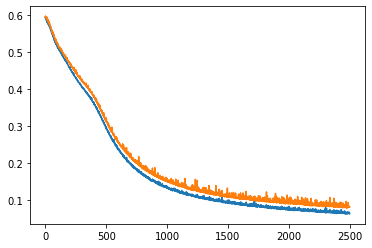

In [ ]:
print(history.history.keys())
print(history.history['loss'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()
#FILL HERE#  use plt.plot() and plt.show() to make a plot with training vs validation loss as function of the epoch
#...
#...



Now let's try to evaluate our model on the xx1,xx2 points we created earlier)

313/313 [==============================] - 0s 1ms/step


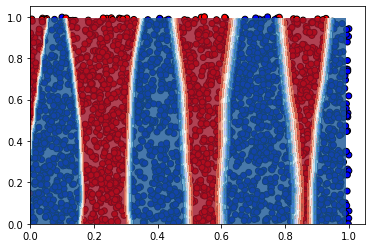

In [ ]:
 
testSet=np.stack((xx1.flatten(), xx2.flatten()), axis=-1)
pred=model.predict(testSet) #FILL THE DOTS# what is the keras function used to evaluate?
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, edgecolors='k')
plt.contourf(xx1, xx2, pred.reshape(xx1.shape), cmap=plt.cm.RdBu, alpha=.8)

Now let's try to create a deep network instead with about the same number of parameters as the MLP above. Let's try with 4 hidden layers, how many nodes per layers are needed?

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_17 (Dense)            (None, 25)                75        
                                                                 
 dense_18 (Dense)            (None, 25)                650       
                                                                 
 dense_19 (Dense)            (None, 25)                650       
                                                                 
 dense_20 (Dense)            (None, 25)                650       
                                                                 
 dense_21 (Dense)            (None, 1)                 26        
                                                                 
Total params: 2,051
Trainable params: 2,051
Non-trainable p

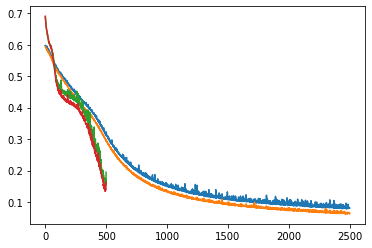

In [ ]:

inputs=Input(shape=(2,))
# add 4 dense hidden layers. You can call them all the same it's not a problem since we won't reference their individual outputs
hidden = Dense(25, activation='relu')(inputs)
hidden = Dense(25, activation='relu')(hidden)
hidden = Dense(25, activation='relu')(hidden)
hidden = Dense(25, activation='relu')(hidden)
outputs = Dense(1, activation='sigmoid')(hidden)

deepmodel = Model(inputs=inputs, outputs=outputs)
deepmodel.compile(loss='binary_crossentropy', optimizer='adam')
deepmodel.summary()
deephistory=deepmodel.fit(X,y,validation_split=0.5,epochs=500,batch_size=128,verbose=1) #CHANGE HERE# Trying increasing number of epochs and changing batch size

plt.plot(history.history["val_loss"])
plt.plot(history.history["loss"])
plt.plot(deephistory.history["val_loss"])
plt.plot(deephistory.history["loss"])
plt.show()

In [2]:
 
testSet=np.stack((xx1.flatten(), xx2.flatten()), axis=-1)
pred=deepmodel.predict(testSet)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, edgecolors='k')
plt.contourf(xx1, xx2, pred.reshape(xx1.shape), cmap=plt.cm.RdBu, alpha=.8)

NameError: ignored